##### Load required librires

In [14]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

##### Download the CSV file from GitHub using __wget__

In [15]:
!wget https://raw.githubusercontent.com/waheeb123/Python/main/diabetes.csv


--2023-09-26 03:05:36--  https://raw.githubusercontent.com/waheeb123/Python/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.2’

diabetes.csv.2      100%[===================>]  23.31K  --.-KB/s    in 0.001s  

2023-09-26 03:05:36 (15.9 MB/s) - ‘diabetes.csv.2’ saved [23873/23873]



In [16]:
#Loading the dataset
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Data Types and Columns:

In [20]:
# Data types of each column
data_types = df.dtypes

# List of columns
columns_list = df.columns
print("Data Types:\n", data_types)
print("\nColumns:\n", columns_list)


Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Columns:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


##### Null Value Counts

In [25]:
# Count of null values in each column
null_counts = df.isnull().sum()
print("\nNull Value Counts:\n", null_counts)



Null Value Counts:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [32]:
# Display the descriptive statistics as a table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


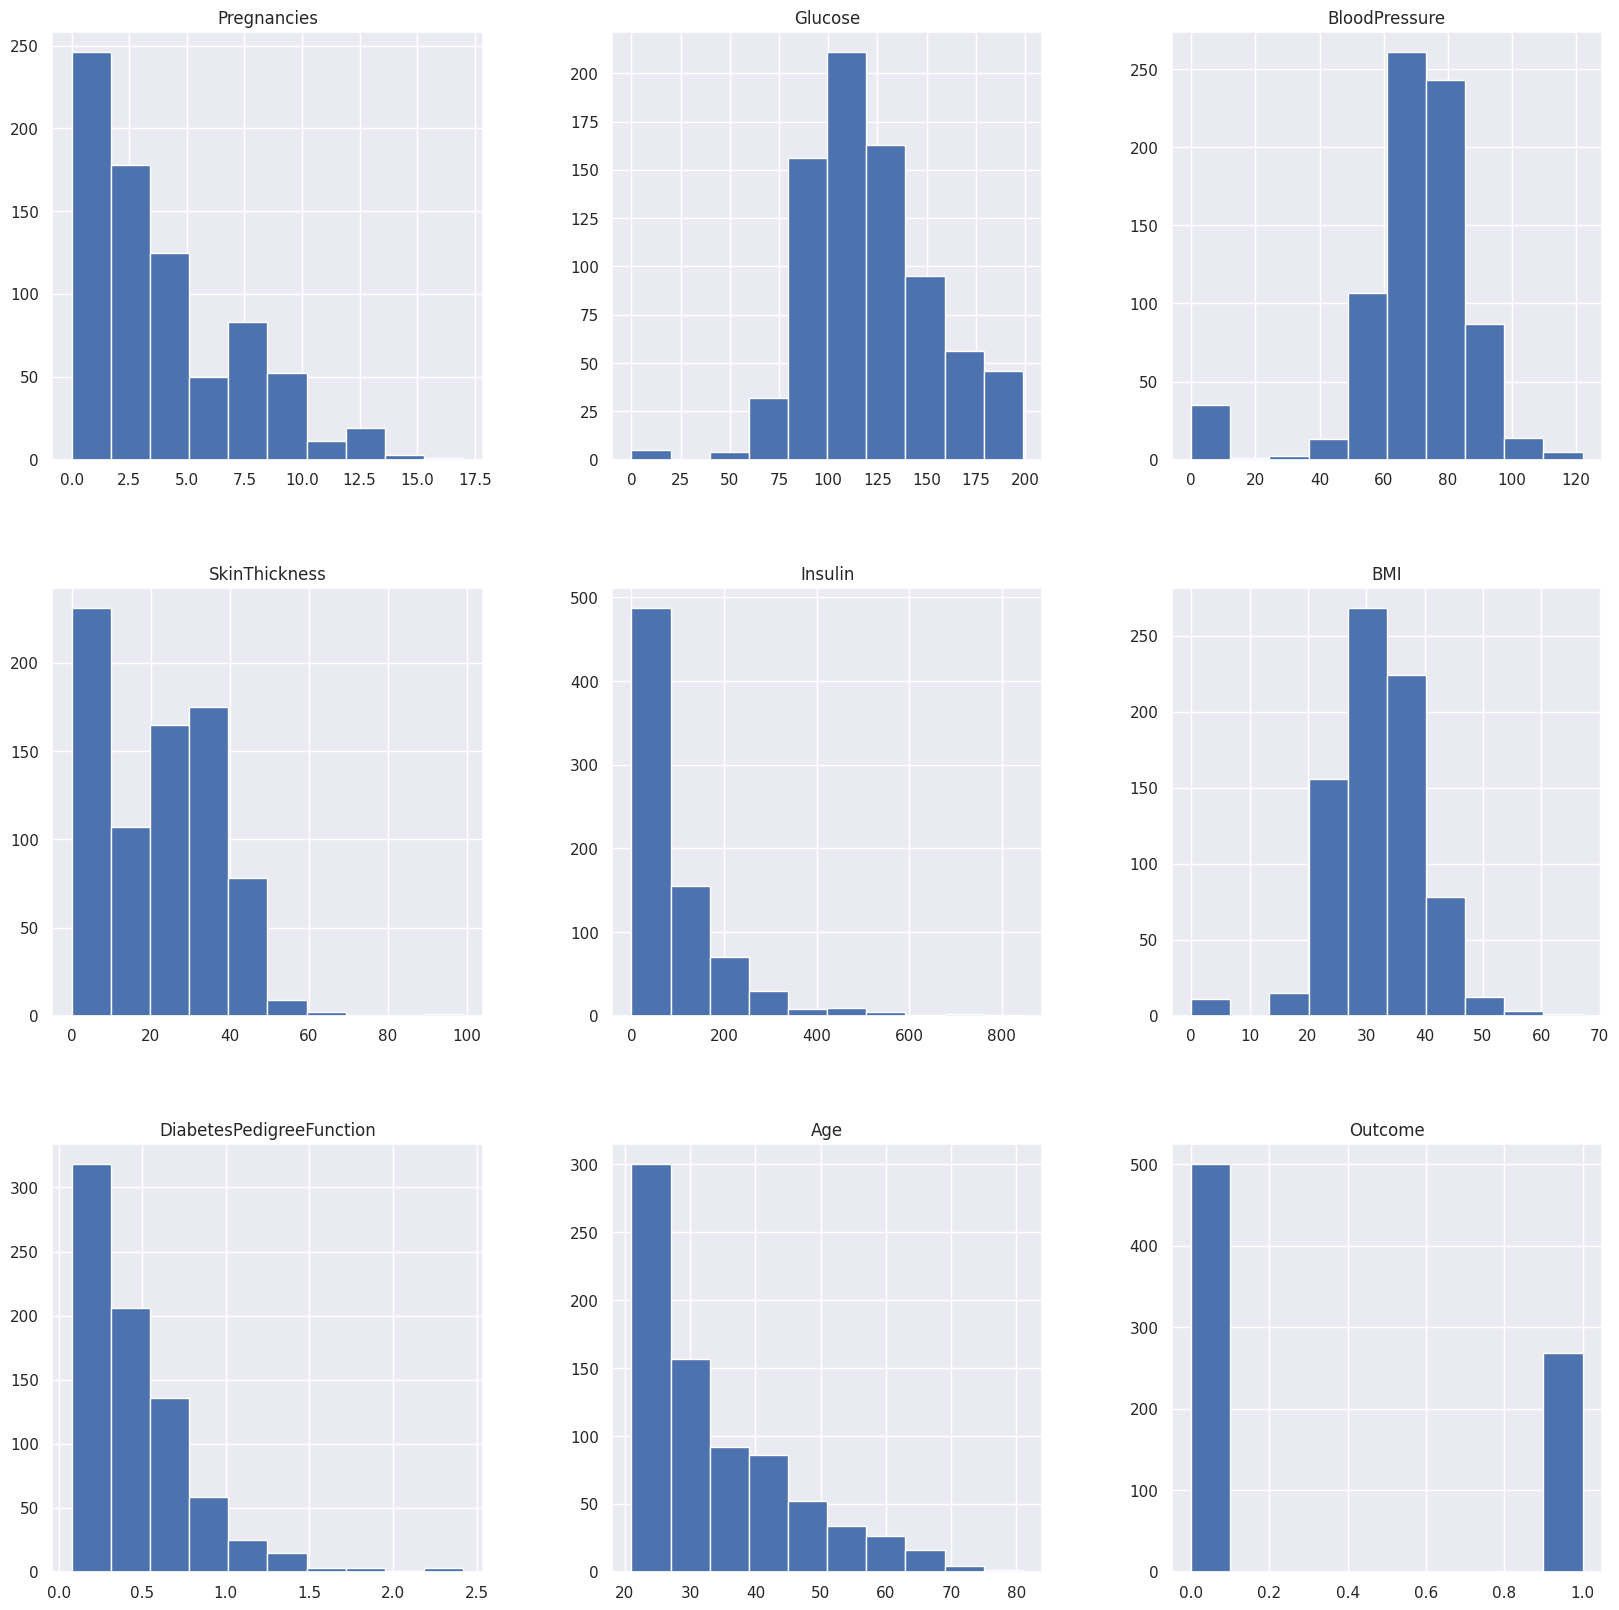

In [34]:
p = df.hist(figsize = (20,20))

In [35]:
## observing the shape of the data
df.shape

(768, 9)

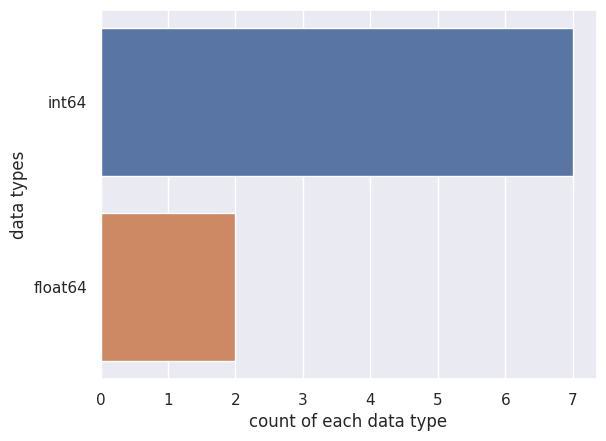

In [38]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

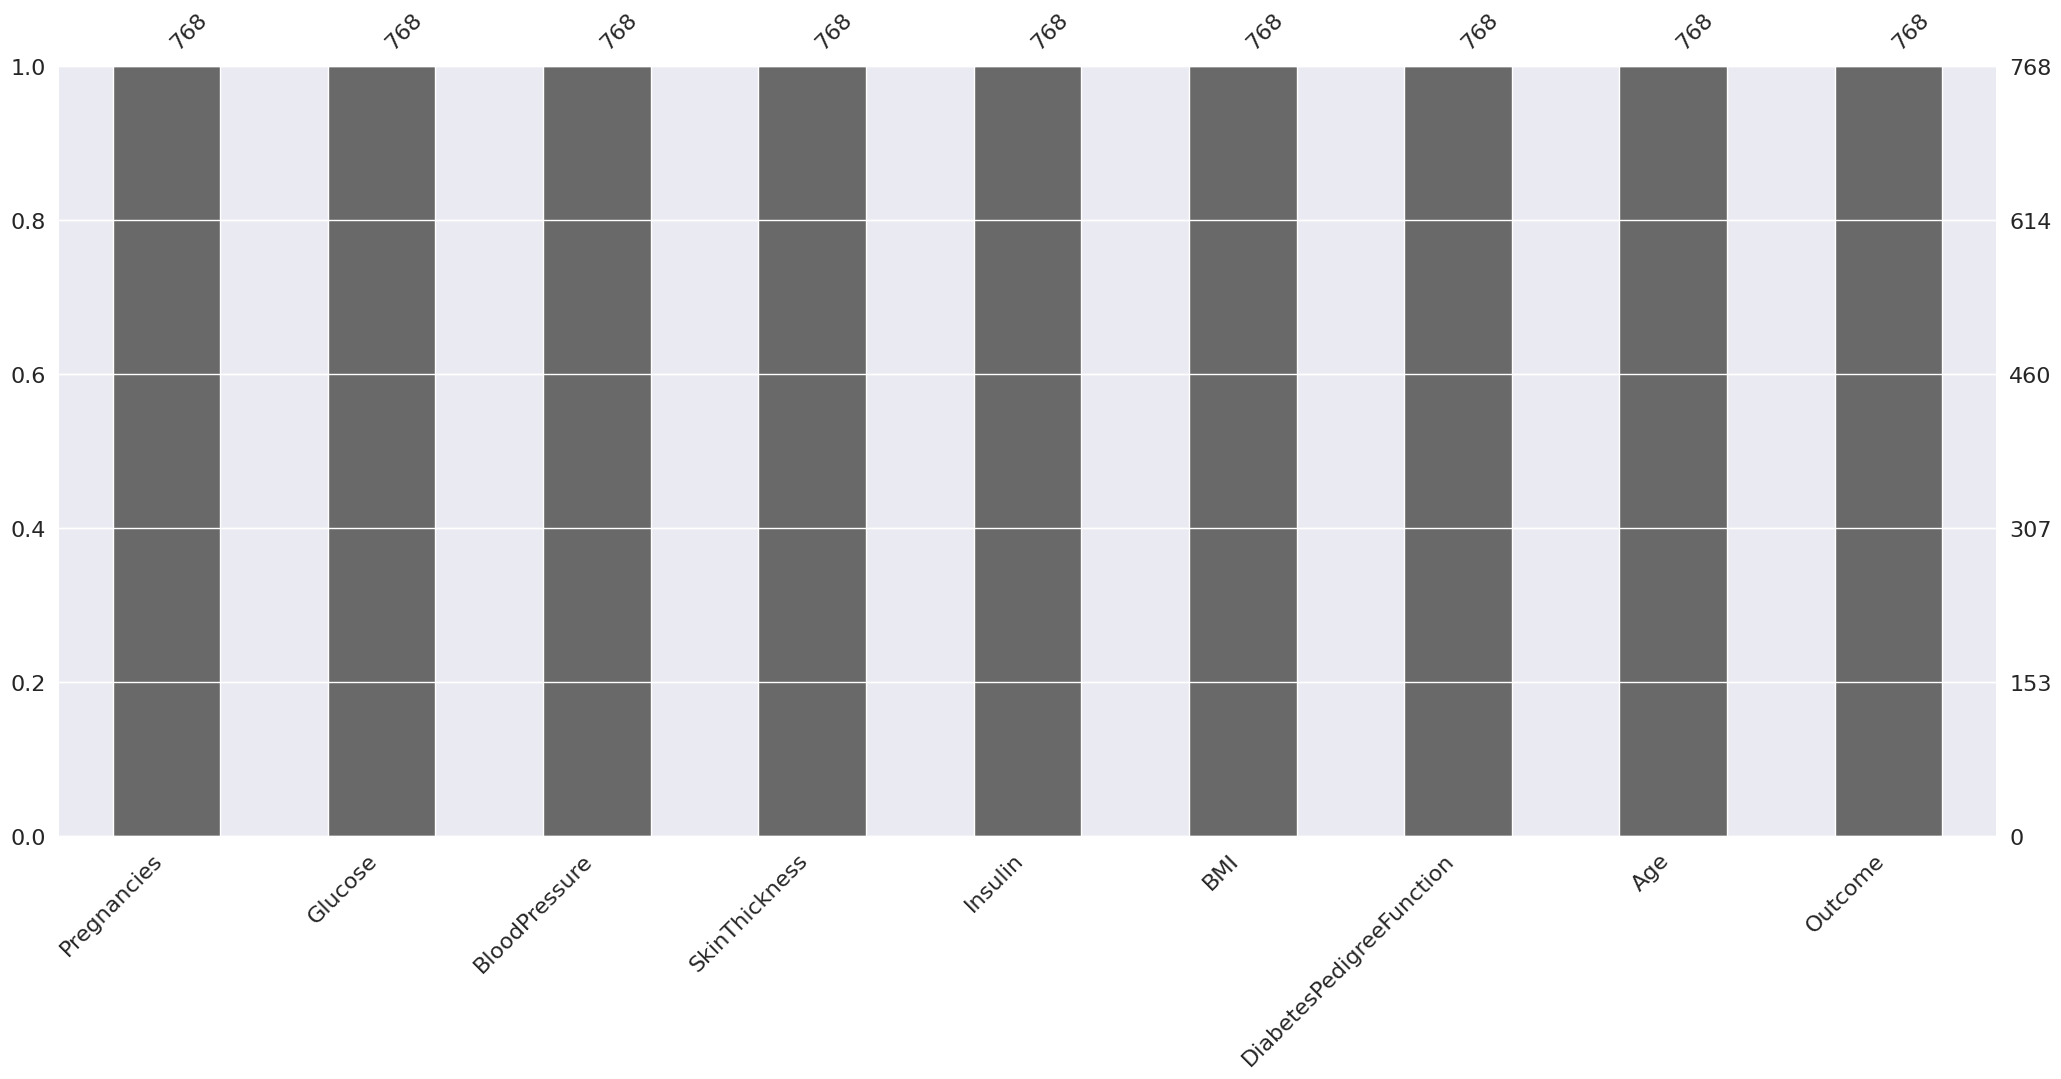

In [41]:
## null count analysis
import missingno as msno
p=msno.bar(df)

0    500
1    268
Name: Outcome, dtype: int64


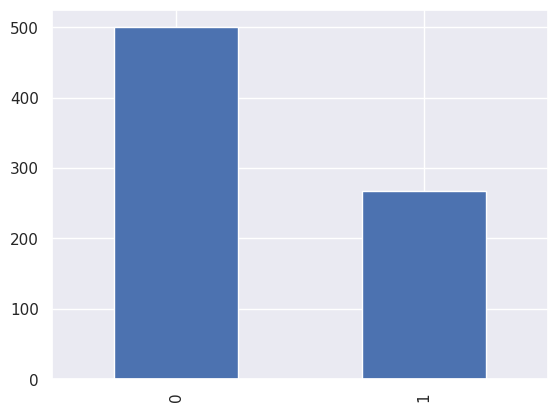

In [43]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "blue",
               2: "orange"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

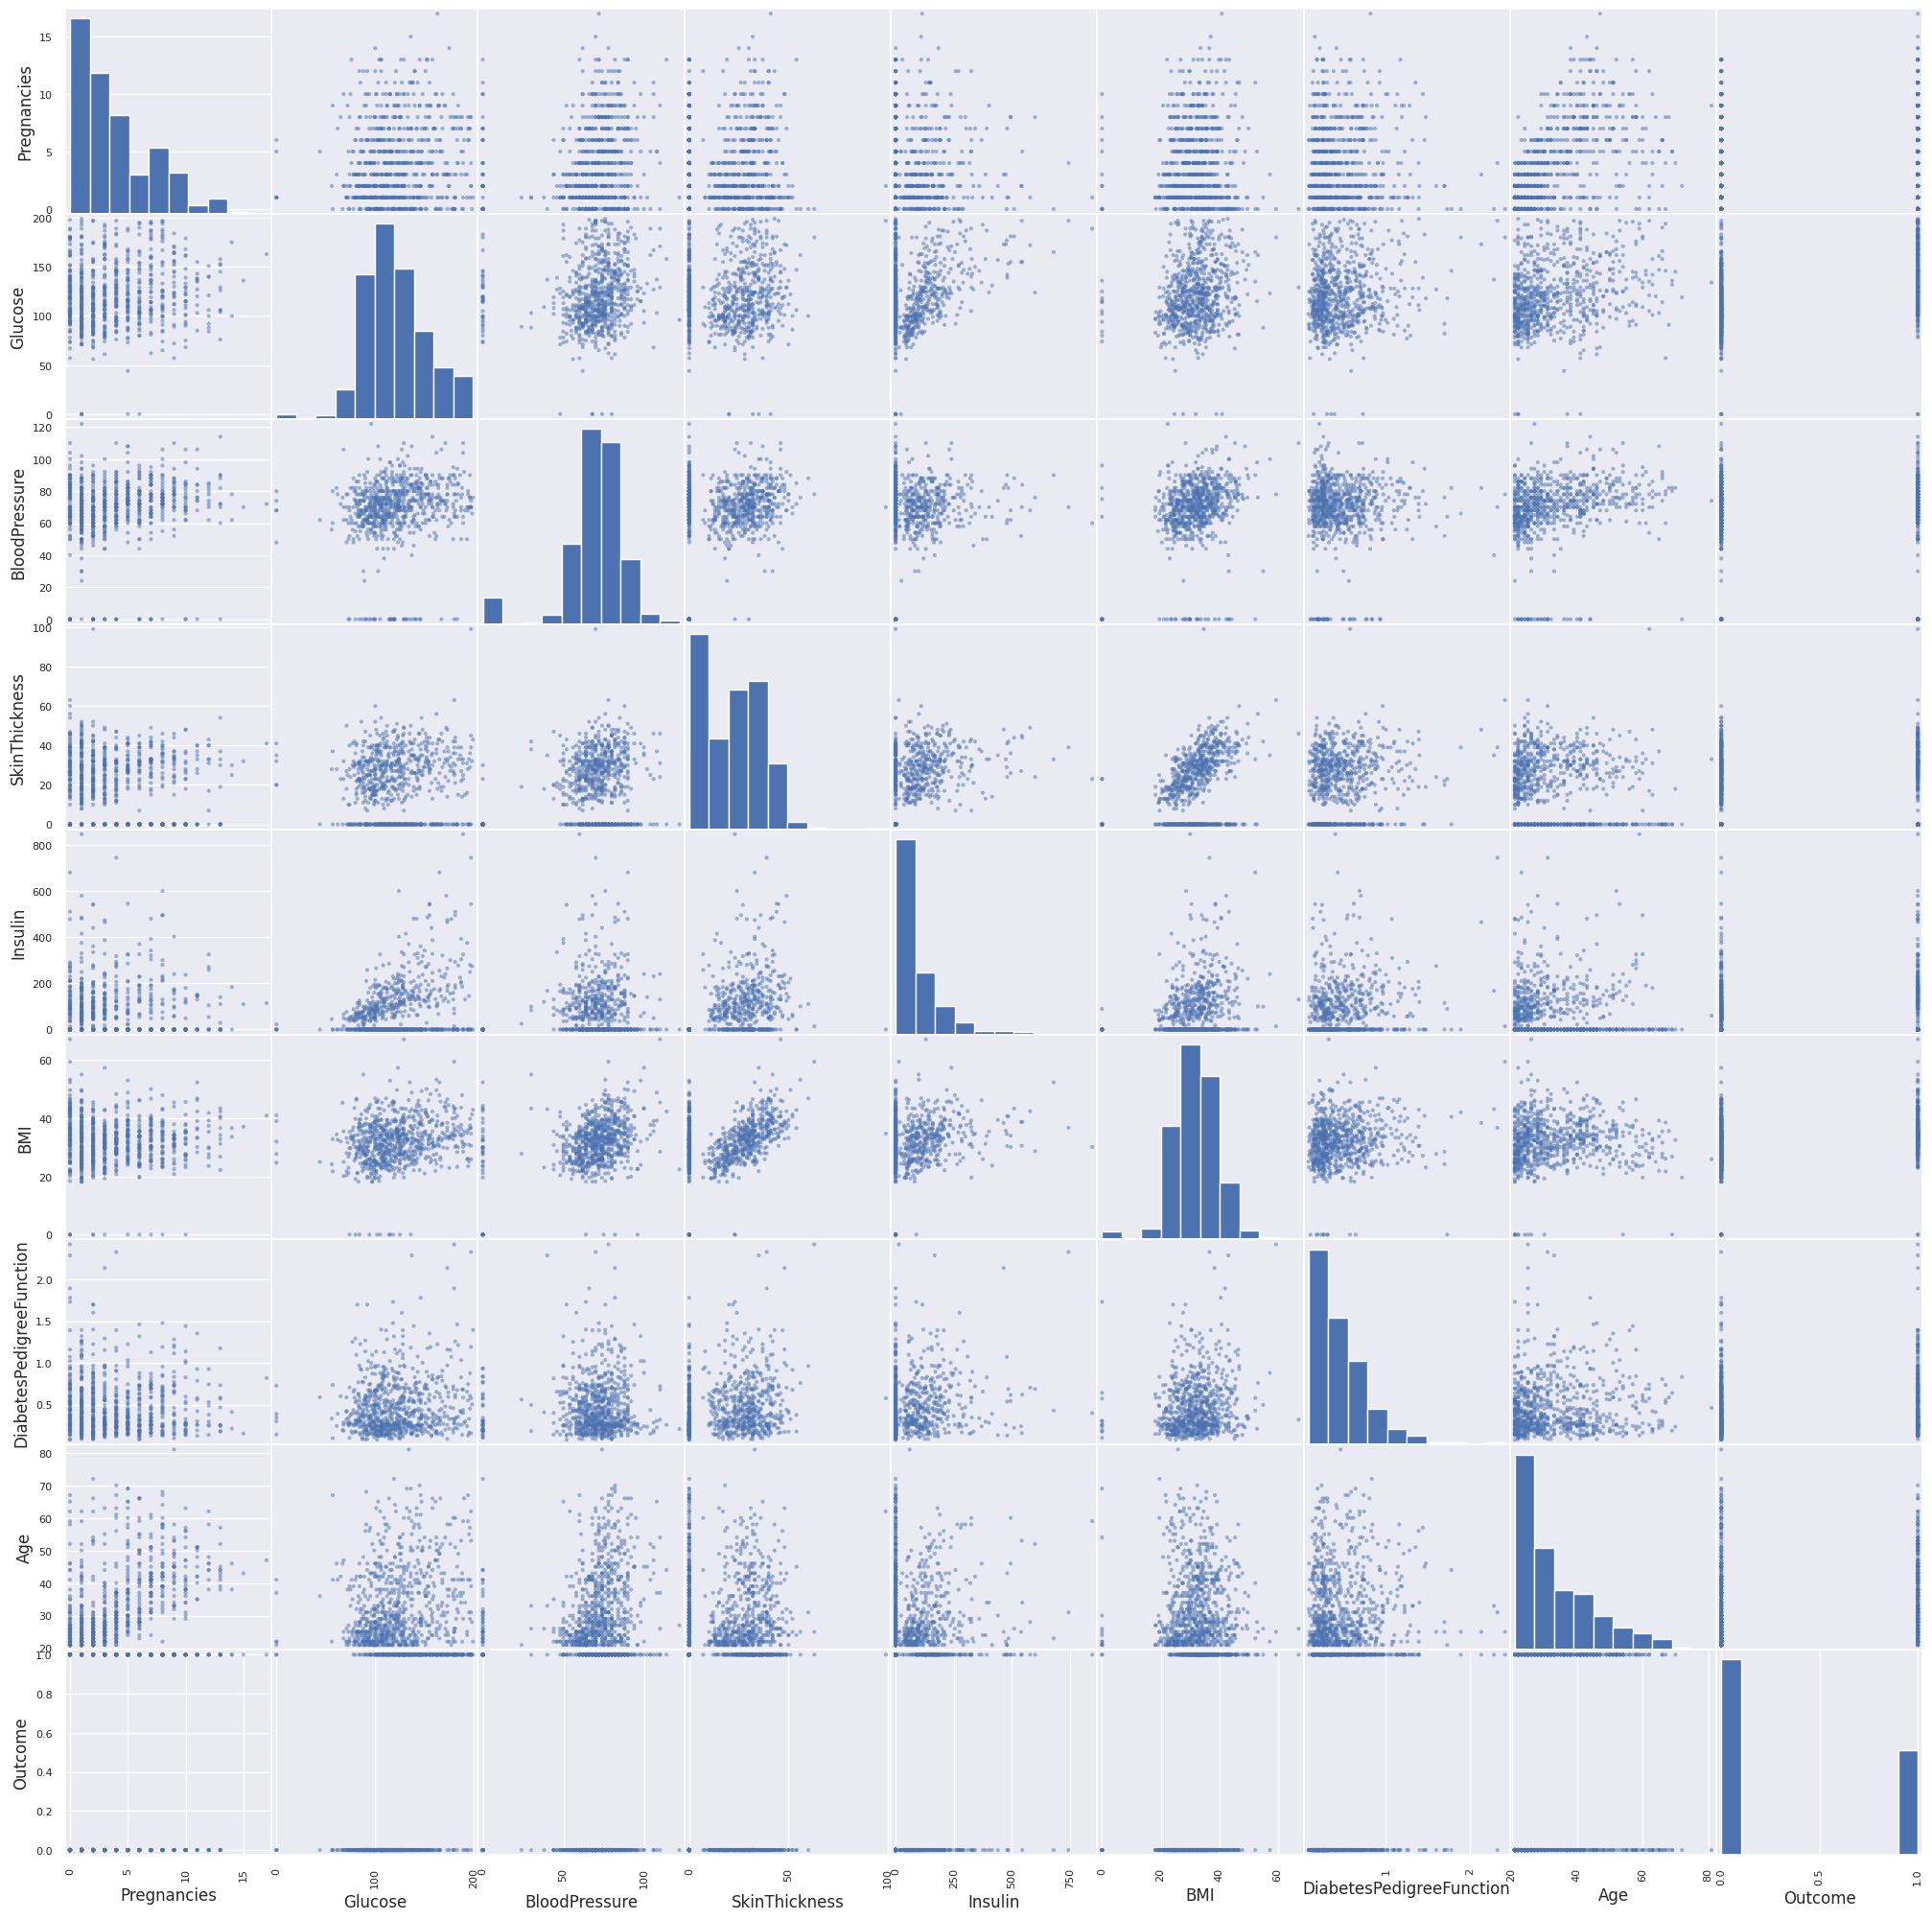

In [49]:
# Scatter matrix of uncleaned data

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df, figsize=(25, 25))
plt.show()


The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

##### Pair plot for clean data

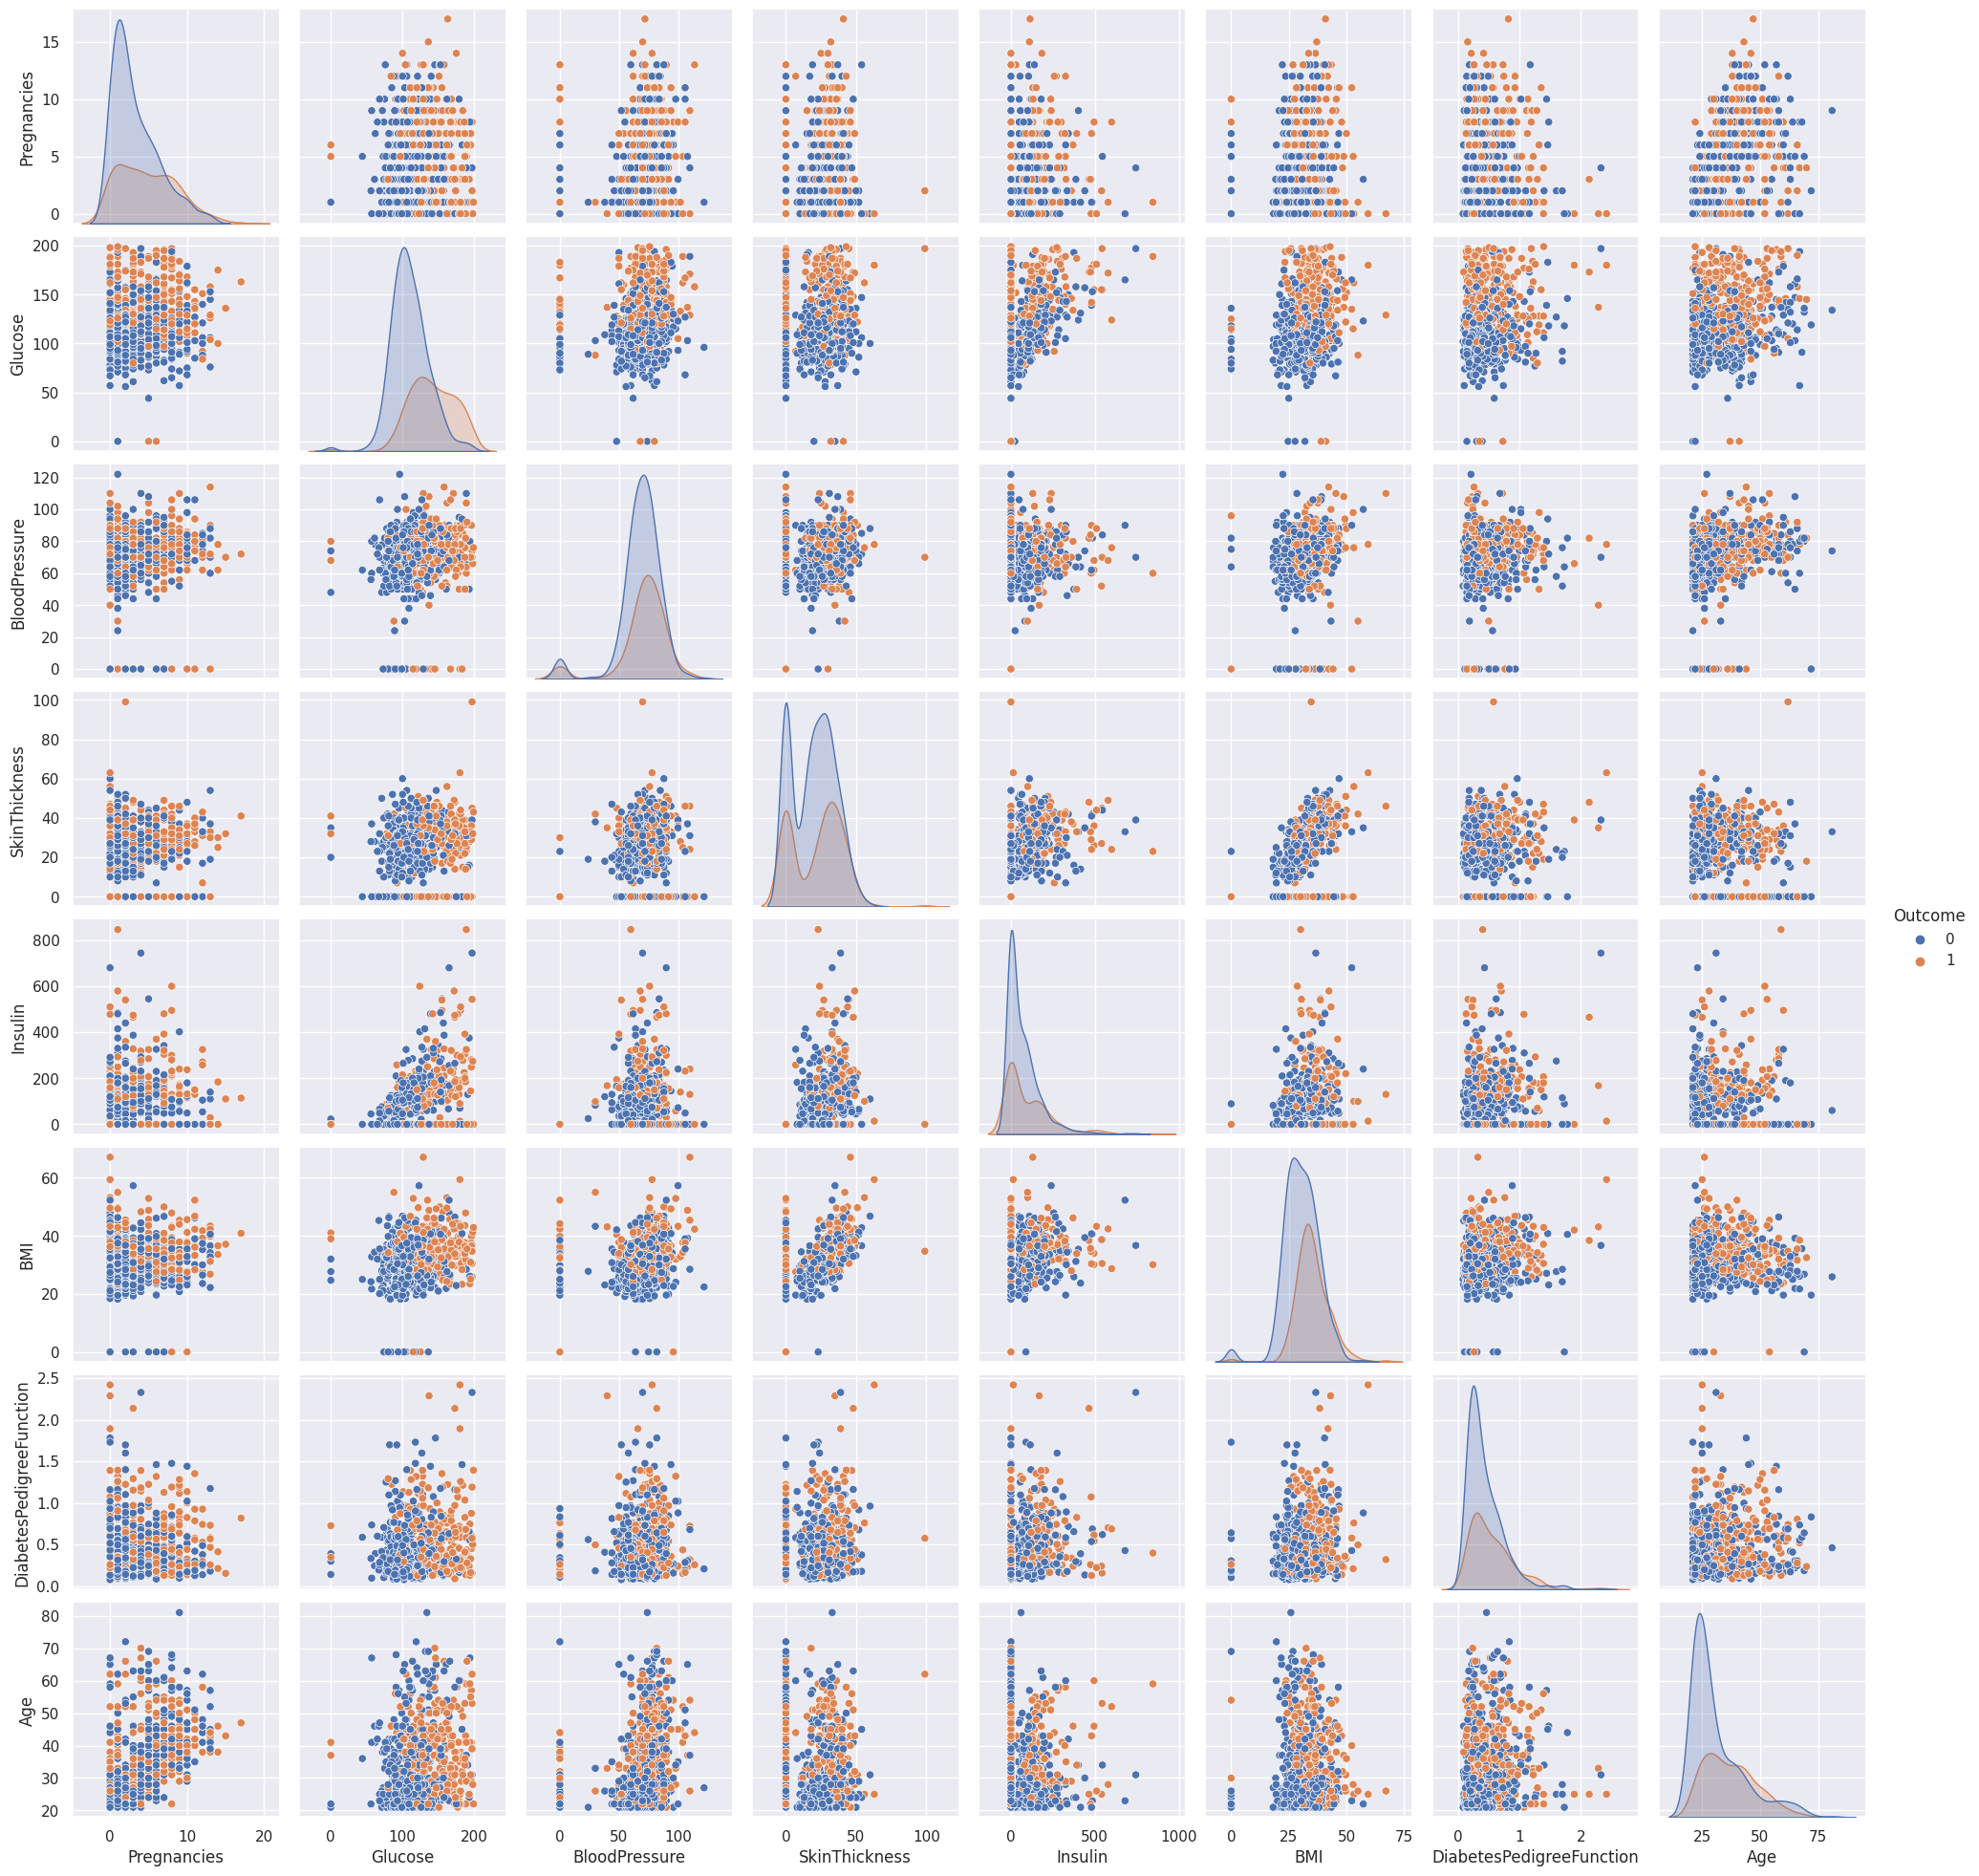

In [52]:
p=sns.pairplot(df, hue = 'Outcome')

Pearson's Correlation Coefficient: helped me to find out the relationship between two quantities. It gave me the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

##### Scaling the data


In [64]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'df' with your data
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [71]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
sc_X = StandardScaler()

# itital my data
your_dataframe_name = df

# Specify the columns to standardize
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Drop the "Outcome" column and standardize the remaining columns
X = pd.DataFrame(sc_X.fit_transform(your_dataframe_name.drop(["Outcome"], axis=1)[columns_to_scale]),
                 columns=columns_to_scale)

# Print the first 5 rows of the standardized DataFrame
print("Scaled DataFrame (First 5 rows):\n")
print(scaled_df.T.head(5).to_string(index=True))

Scaled DataFrame (First 5 rows):

                    0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94    